# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
'''
1. Built-in Sobel, Prewill, Roberts
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

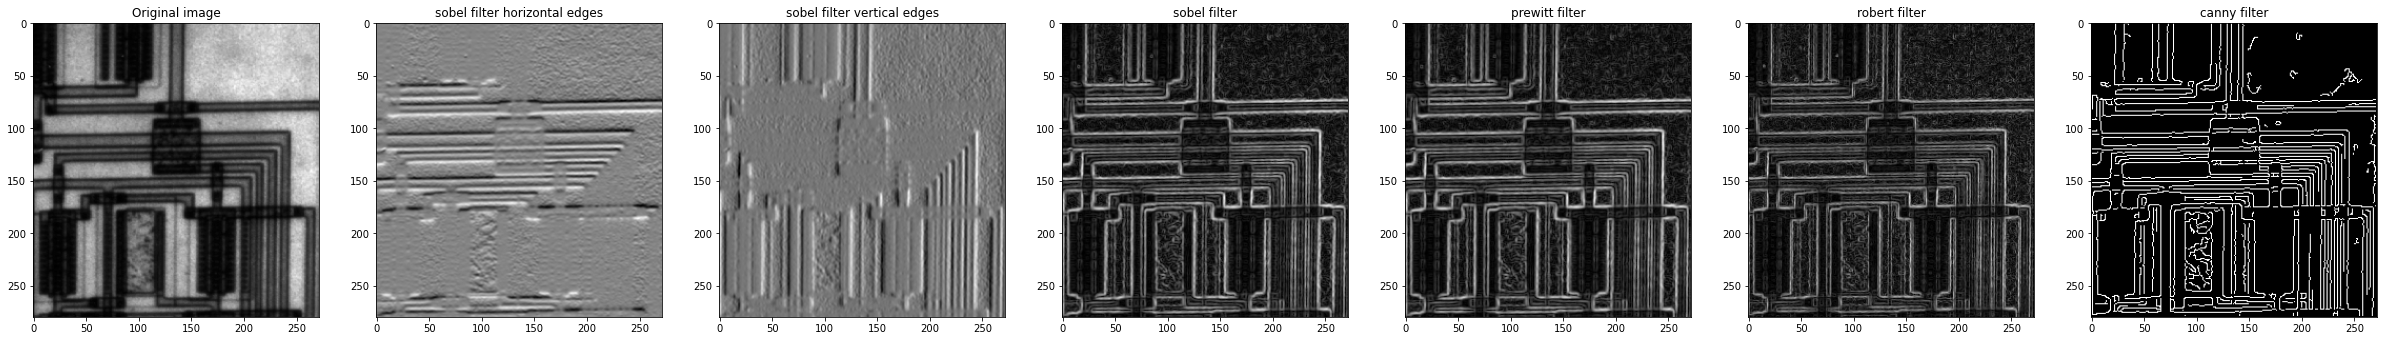

In [50]:
# 1. Built-in Sobel, Prewill, Roberts

img = io.imread('circuit.tif')

sobelH_Image = sobel_h(img)
sobelV_Image = sobel_v(img)
sobel_Image = sobel(img)
prewitt_Image = prewitt(img)
roberts_Image = roberts(img)
canny_Image = canny(img)


show_images(images=[img,sobelH_Image,sobelV_Image,sobel_Image,prewitt_Image,roberts_Image,canny_Image],
            titles=["Original image","sobel filter horizontal edges","sobel filter vertical edges","sobel filter","prewitt filter","robert filter","canny filter"])

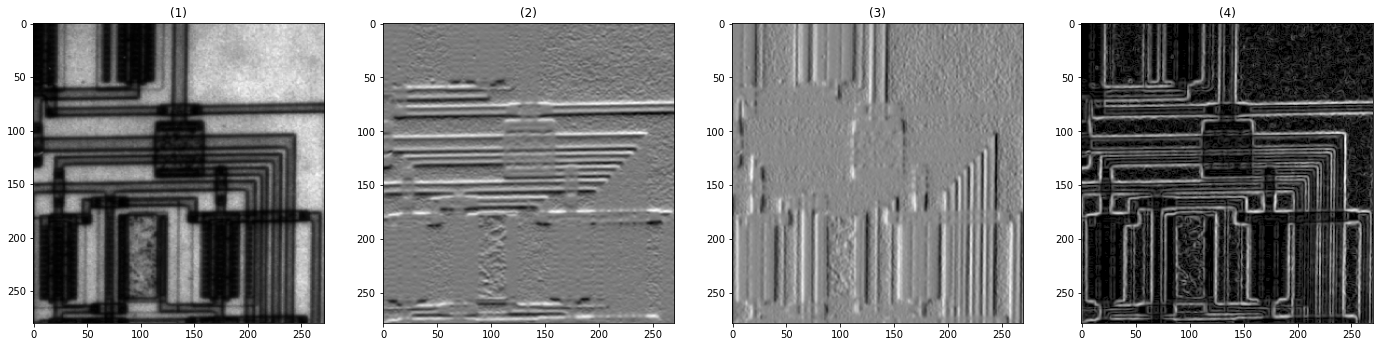

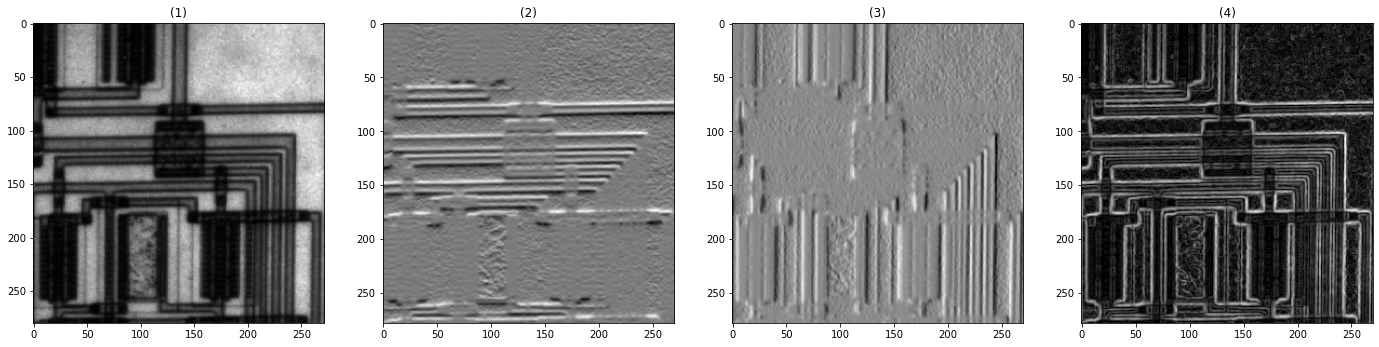

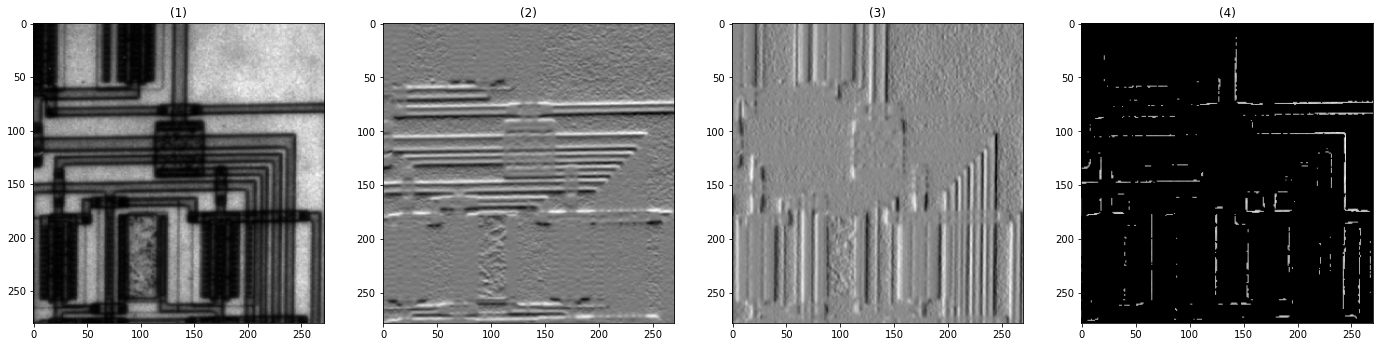

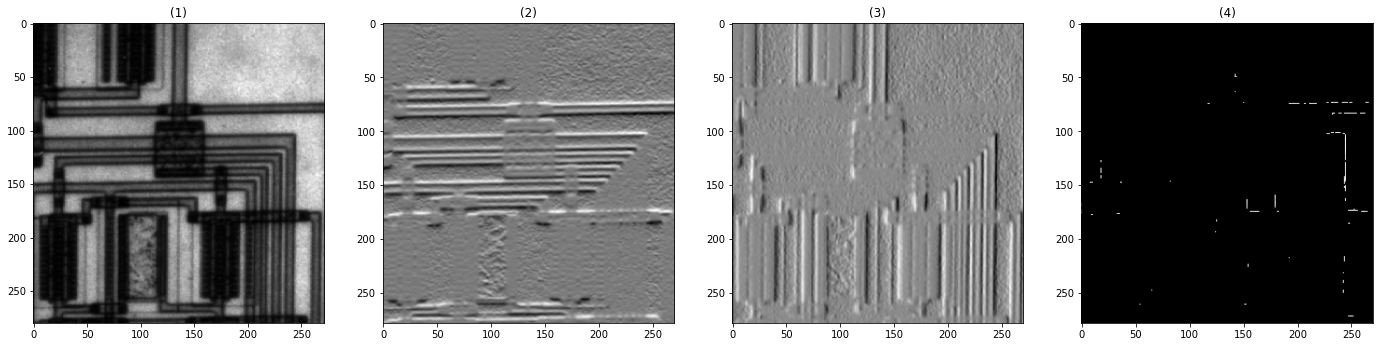

In [7]:
# 2. Custom Sobel (V-H-Both)
def CustomSobel(image,Threshold=20,window_width=3, window_height=3):
    x_edges_img = np.zeros(image.shape)
    y_edges_img = np.zeros(image.shape)
    xy_edges_img = np.zeros(image.shape)
    
    hx = np.array([
        [-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]
    ])       
    hy = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    
    x_edges_img = convolve2d(image,hx,mode="valid")
    y_edges_img = convolve2d(image,hy,mode="valid")
            
            
    xy_edges_img = np.sqrt(x_edges_img**2 + y_edges_img**2)
    xy_edges_img[xy_edges_img<Threshold]=0
    
    return x_edges_img/255,y_edges_img/255,xy_edges_img/255
    



img = io.imread('circuit.tif')
x,y,xy=CustomSobel(image=img)
show_images(images=[img,x,y,xy])

x,y,xy=CustomSobel(image=img,Threshold=10)
show_images(images=[img,x,y,xy])

x,y,xy=CustomSobel(image=img,Threshold=200)
show_images(images=[img,x,y,xy])

x,y,xy=CustomSobel(image=img,Threshold=250)
show_images(images=[img,x,y,xy])

[[ 15.2011394   15.00858072  14.85527939 ... 146.79412787 145.80968448
  145.45836835]
 [ 15.40744934  15.1329769   14.91278383 ... 146.13677411 146.04927997
  146.57327255]
 [ 15.60796306  15.25983223  14.98068831 ... 146.05193191 146.74301072
  147.96543016]
 ...
 [ 45.81677458  53.29465756  60.44095507 ...  71.46653635  71.03572377
   68.02886527]
 [ 41.26385213  47.32278966  52.85544614 ...  72.07858072  71.45424278
   68.33633155]
 [ 37.48763545  42.42779642  46.74734748 ...  72.51407352  71.71282596
   68.51351055]] 

[[-0.16990105 -0.49817457 -0.64647868 ... -1.66563787 -3.43613258
  -3.13836039]
 [ 0.03068876 -0.386955   -0.55207349 ... -3.24939659 -4.14832422
  -2.87510032]
 [ 0.12959916 -0.31741307 -0.46143608 ... -2.8706143  -3.21199926
  -1.6479114 ]
 ...
 [ 3.47315081 11.35727787 15.02788939 ...  7.21013699 11.53589329
   7.68711609]
 [ 1.22908065  7.37809725  9.33753912 ...  7.95077971 12.08291784
   7.90030807]
 [-1.75214754  2.63703148  3.26489954 ...  8.67282579 12.443

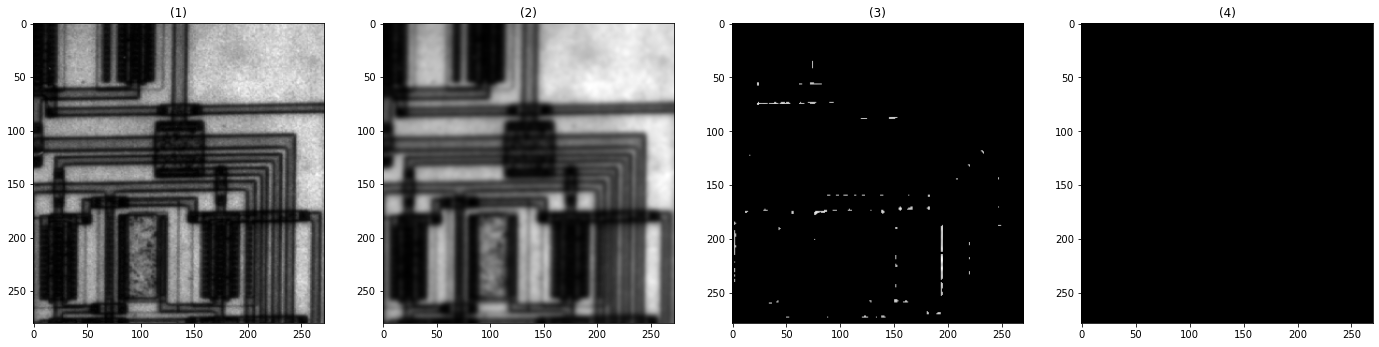

In [16]:
# 3. Custom LoG
def CustomLoG(image,Threshold=20,window_width=3, window_height=3):
    F1 = np.array([
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]
    ])   
    F2 = np.array([
        [0,  1, 0],
        [1, -4, 1],
        [0,  1, 0]
    ])

    F1_img = image*255
    F2_img = image*255
    
    
    print(F1_img,'\n')
    F1_img = convolve2d(F1_img,F1,mode="valid")
    F2_img = convolve2d(F2_img,F2,mode="valid")
    
    print(F1_img,'\n')
    F1_img[F1_img<Threshold]=0
    F2_img[F2_img<Threshold]=0
    print(F1_img)
    return F1_img/255,F2_img/255


img = io.imread('circuit.tif')
filtteredimg = gaussian(img, sigma=1.8)

f1,f2 = CustomLoG(image=filtteredimg)
show_images(images=[img,filtteredimg,f1,f2])

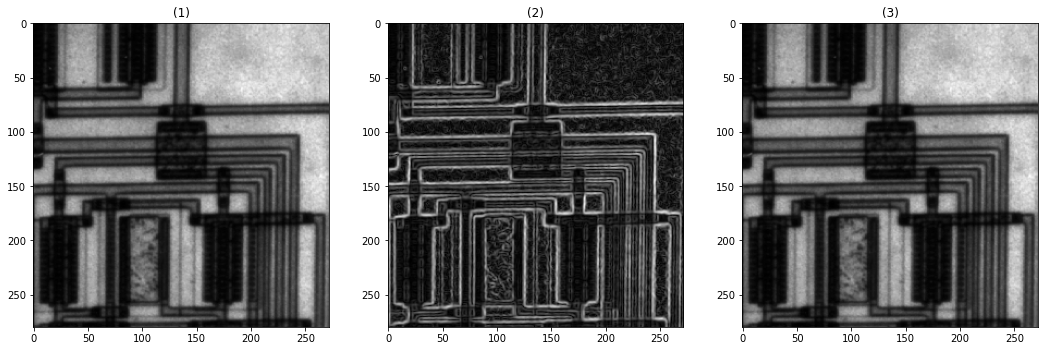

In [6]:

'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

factoredImage = sobel_Image * 0.3
show_images(images=[img,sobel_Image,img-factoredImage])